## Name: Rohini Kokare
MIS No: 812203003

1. Take any different dataset (apart from breast cancer) that has target value binary (0 OR 1).
2. Visualize the data using various graphs using matplotlib or sklearn python libraries.
3. Transform data according to model requirements. HINT [MP-Neuron takes only BINARY DATA as input]
4. Split the data for training and testing.
5. Train MP-Neuron Model on the choosen dataset and test it on the testing set to get model accuracy.
6. Train Perceptron Model on the choosen dataset and test it on the testing set to get model accuracy.
* [Write CLASS based model as shown in LAB for Statement 5 and 6]
* [Visualize the training accuracy or loss for the models] 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sn
from sklearn.utils import resample

In [2]:
dataset = pd.read_csv('social_network_ads.csv')

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [36]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


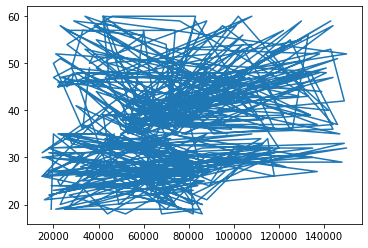

In [4]:
plt.plot(dataset['EstimatedSalary'],dataset['Age'])

In [38]:
dataset.shape

(400, 5)

In [39]:
dataset.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
dataset_line = dataset.loc[0:15]

In [6]:
dataset_line

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


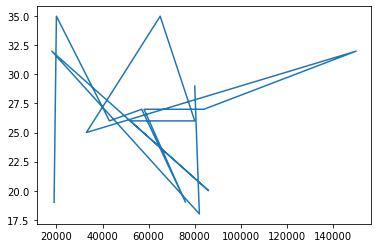

In [7]:
plt.plot(dataset_line['EstimatedSalary'],dataset_line['Age'])

In [8]:
dataset.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
296,15673539,Male,42,73000,1


In [9]:
dataset_scatter = dataset.loc[0:15]

In [10]:
dataset_scatter

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


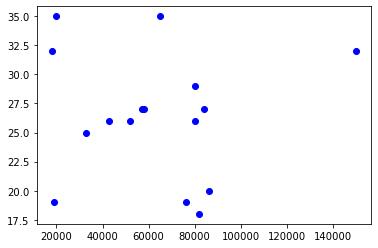

In [11]:
plt.scatter(dataset_scatter['EstimatedSalary'], dataset_scatter['Age'], c ="blue")
plt.show()

In [ ]:
df["Outcome"].value_counts()
# Data is Imbalanced

In [12]:
x = dataset.loc[0:15]['Age']
y = dataset.loc[0:15]['EstimatedSalary']
z = dataset.loc[0:15]['Gender']

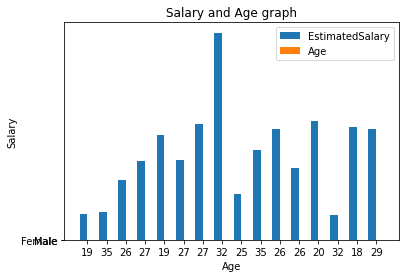

In [13]:
x_new = np.arange(len(x))
plt.bar(x_new - 0.2, y, 0.4, label = 'EstimatedSalary')
plt.bar(x_new + 0.2, z, 0.4, label = 'Age')
  
plt.xticks(x_new, x)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Salary and Age graph")
plt.legend()
plt.show()

In [14]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [15]:
dataset.groupby('Purchased').mean()

,User ID,Age,EstimatedSalary
Purchased,,,
0,1.569116e+07,32.793774,60544.747082
1,1.569222e+07,46.391608,86272.727273


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchased', ylabel='count'>

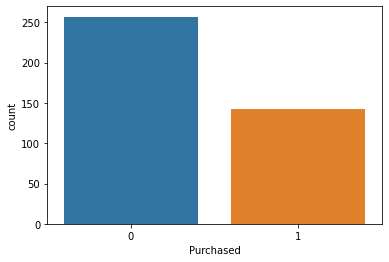

In [16]:
# check data equivalence 
sn.countplot(dataset['Purchased'])

In [17]:
# dataset is imbalanced so balanced it 
# so create two dataframe with df_major and df_minor 
df_major = dataset[(dataset['Purchased'] == 0)]
df_minor = dataset[(dataset['Purchased'] == 1)]
df_minority_upsampled = resample(df_minor, 
                                 replace=True,    # sample with replacement
                                 n_samples= 257, # to match majority class
                                 random_state= 7255)  # result to reproduce
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_major])

In [18]:
# check balancing again
df_upsampled['Purchased'].value_counts()

0    257
1    257
Name: Purchased, dtype: int64

In [19]:
x = df_upsampled.drop("Purchased", axis = 1) # axis = 1 removes column and axis = 0 removes row from dataset
y = df_upsampled["Purchased"]
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [20]:
x_train

,User ID,Gender,Age,EstimatedSalary
383,15707634,Male,49,28000
226,15795224,Female,36,126000
169,15579781,Female,29,47000
246,15638003,Female,35,50000
67,15654574,Female,23,82000
...,...,...,...,...
182,15694288,Female,32,117000
389,15668521,Female,48,35000
224,15575002,Female,35,60000
219,15732987,Male,59,143000


In [21]:
y_test

230    1
24     1
198    0
287    1
366    1
      ..
80     0
177    0
390    1
99     0
77     0
Name: Purchased, Length: 129, dtype: int64

In [22]:
print('x shape : ', x.shape)
print('x train shape and x test shape : ' ,x_train.shape, x_test.shape)
print('y shape : ', y.shape)
print('y train shape and y test shape : ' ,y_train.shape, y_test.shape)

x shape :  (514, 4)
x train shape and x test shape :  (385, 4) (129, 4)
y shape :  (514,)
y train shape and y test shape :  (385,) (129,)


In [23]:
# take mean 
print(np.mean(x_train))
print(np.mean(x_test))

User ID            1.568900e+07
Age                3.946494e+01
EstimatedSalary    7.469091e+04
dtype: float64
User ID            1.569775e+07
Age                4.011628e+01
EstimatedSalary    7.111628e+04
dtype: float64


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9,test_size = 0.1)
print("x: ",x.shape,x_train.shape, x_test.shape)
print("y: ",y_train.shape, y_test.shape)

x:  (514, 4) (462, 4) (52, 4)
y:  (462,) (52,)


In [25]:
print(np.mean(x_train))
print(np.mean(x_test))

User ID            1.569331e+07
Age                3.956926e+01
EstimatedSalary    7.348485e+04
dtype: float64
User ID            1.567239e+07
Age                4.015385e+01
EstimatedSalary    7.653846e+04
dtype: float64


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9,test_size = 0.1, stratify = y )

In [27]:
print(np.mean(x_train))
print(np.mean(x_test))

User ID            1.569293e+07
Age                3.956494e+01
EstimatedSalary    7.408658e+04
dtype: float64
User ID            1.567584e+07
Age                4.019231e+01
EstimatedSalary    7.119231e+04
dtype: float64


In [45]:
print("X_train shape :",x_train.shape)
print("X_test shape :",x_test.shape)
print("Y_train shape :",y_train.shape)
print("Y_test shape :",y_test.shape)

X_train shape : (462, 4)
X_test shape : (52, 4)
Y_train shape : (462,)
Y_test shape : (52,)


In [46]:
b = 10

i = 326

print("For row", i)

if (np.sum(x_train.loc[i]) >= b):
    print("MP Neuron inference is 0")
else:
    print("MP Neuron inference is 1")

if (y_train[i] == 1):
    print("Ground Truth is 0")
else:
    print("Ground truth is 1")

For row 326


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U4')) -> None

In [47]:
x_binarised_train = x_train.apply(pd.cut, bins=2, labels=[1,0])
x_binarised_test = x_test.apply(pd.cut, bins=2, labels=[1,0])

TypeError: can only concatenate str (not "float") to str